# SSA Showcase - Ready Visuals

Professional visualizations demonstrating Singular Spectrum Analysis capabilities.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ssa_wrapper import SSA, MSSA
import warnings
warnings.filterwarnings('ignore')

# Professional plot settings
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.dpi'] = 100

# Colors
C_CLEAN = '#2ecc71'      # Green
C_NOISY = '#3498db'      # Blue  
C_SSA = '#e74c3c'        # Red
C_TREND = '#e67e22'      # Orange
C_BG = '#ecf0f1'         # Light gray

def snr_db(clean, estimate):
    return 10 * np.log10(np.var(clean) / np.var(estimate - clean))

def ensemble_denoise(signal, L_fractions=[1/4, 1/3, 2/5, 1/2], weights=None):
    """Ensemble SSA denoising with automatic cutoff."""
    N = len(signal)
    results = []
    
    for frac in L_fractions:
        L = int(N * frac)
        ssa = SSA(signal, L=L)
        k = min(60, L - 1)
        ssa.decompose(k=k)
        
        var = [ssa.variance_explained(i, i) for i in range(k)]
        ratios = [var[i] / (var[i+1] + 1e-12) for i in range(k-1)]
        cutoff = np.argmax(ratios) + 1
        
        results.append(ssa.reconstruct(list(range(cutoff))))
    
    if weights is None:
        weights = np.arange(1, len(L_fractions) + 1, dtype=float)
    weights = np.array(weights) / np.sum(weights)
    
    return sum(w * r for w, r in zip(weights, results))

np.random.seed(42)
print("Ready for showcase!")

Python: 3.13.1 (tags/v3.13.1:0671451, Dec  3 2024, 19:06:28) [MSC v.1942 64 bit (AMD64)]
Platform: win32
Looking for: C:\Users\Tugbars\Desktop\Singular-Spectrum-Analysis\MKL\py\ssa.dll
Exists: True
MKL path C:\Program Files (x86)\Intel\oneAPI\mkl\latest\bin: exists=True
MKL path C:\Program Files (x86)\Intel\oneAPI\compiler\latest\bin: exists=True
SUCCESS!
Ready for showcase!


---
## 🎯 Showcase 1: Dramatic Noise Reduction (Hero Image)

**Best for: Main LinkedIn post image**

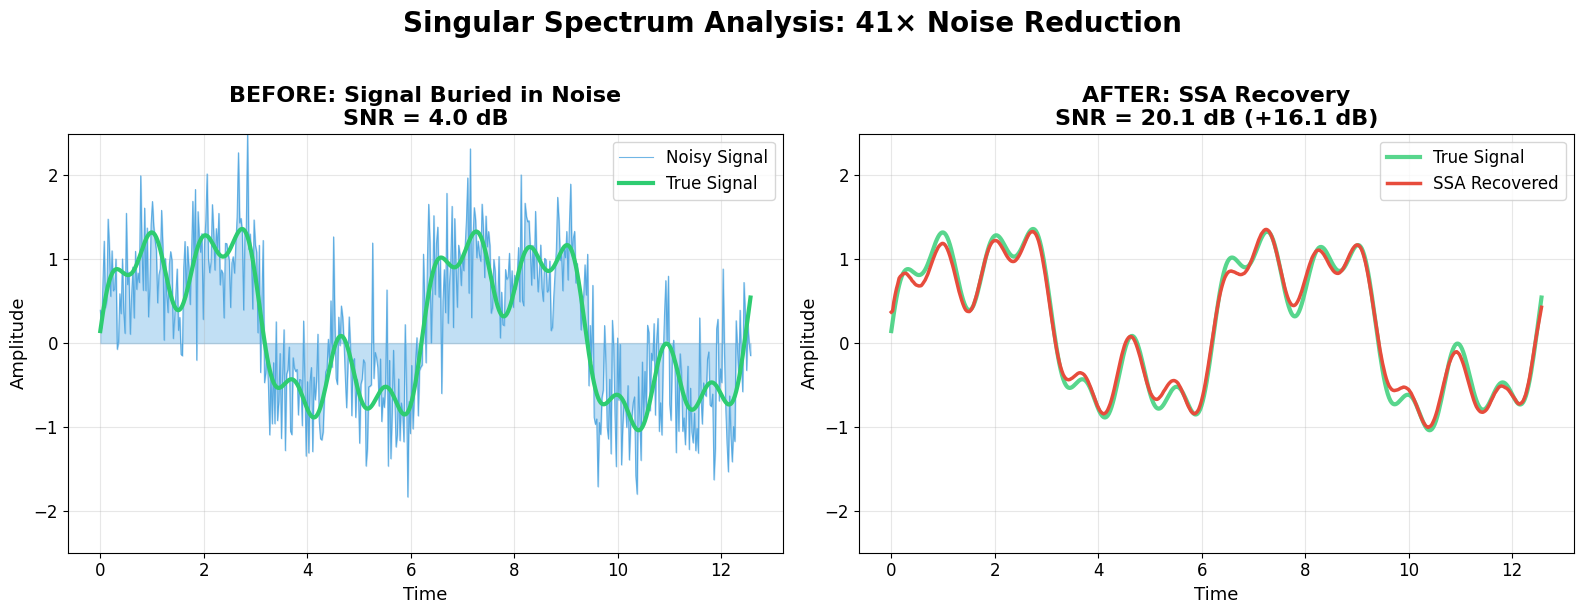


✓ Saved: linkedin_hero.png
  SNR improvement: 4.0 → 20.1 dB
  Noise reduction: 41×


In [2]:
# Generate complex signal
N = 500
t = np.linspace(0, 4 * np.pi, N)

clean = (
    np.sin(t) + 
    0.5 * np.sin(3 * t) + 
    0.3 * np.sin(7 * t + 0.5) + 
    0.2 * np.sin(0.5 * t) +
    0.4 * t / t.max()
)

noise = 0.5 * np.random.randn(N)
noisy = clean + noise
denoised = ensemble_denoise(noisy)

snr_before = snr_db(clean, noisy)
snr_after = snr_db(clean, denoised)
improvement = 10 ** ((snr_after - snr_before) / 10)

# === HERO IMAGE ===
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Before
axes[0].fill_between(t, noisy, alpha=0.3, color=C_NOISY, label='_')
axes[0].plot(t, noisy, color=C_NOISY, lw=0.8, alpha=0.7, label=f'Noisy Signal')
axes[0].plot(t, clean, color=C_CLEAN, lw=3, label='True Signal')
axes[0].set_title(f'BEFORE: Signal Buried in Noise\nSNR = {snr_before:.1f} dB', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Time', fontsize=13)
axes[0].set_ylabel('Amplitude', fontsize=13)
axes[0].legend(loc='upper right', fontsize=12)
axes[0].set_ylim([-2.5, 2.5])

# After
axes[1].plot(t, clean, color=C_CLEAN, lw=3, label='True Signal', alpha=0.8)
axes[1].plot(t, denoised, color=C_SSA, lw=2.5, label='SSA Recovered', linestyle='-')
axes[1].set_title(f'AFTER: SSA Recovery\nSNR = {snr_after:.1f} dB (+{snr_after-snr_before:.1f} dB)', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Time', fontsize=13)
axes[1].set_ylabel('Amplitude', fontsize=13)
axes[1].legend(loc='upper right', fontsize=12)
axes[1].set_ylim([-2.5, 2.5])

plt.suptitle(f'Singular Spectrum Analysis: {improvement:.0f}× Noise Reduction', 
             fontsize=20, fontweight='bold', y=1.02)

plt.tight_layout()
plt.savefig('linkedin_hero.png', dpi=200, bbox_inches='tight', facecolor='white', edgecolor='none')
plt.show()

print(f"\n✓ Saved: linkedin_hero.png")
print(f"  SNR improvement: {snr_before:.1f} → {snr_after:.1f} dB")
print(f"  Noise reduction: {improvement:.0f}×")

---
## 📊 Showcase 2: Before/After with Metrics Panel

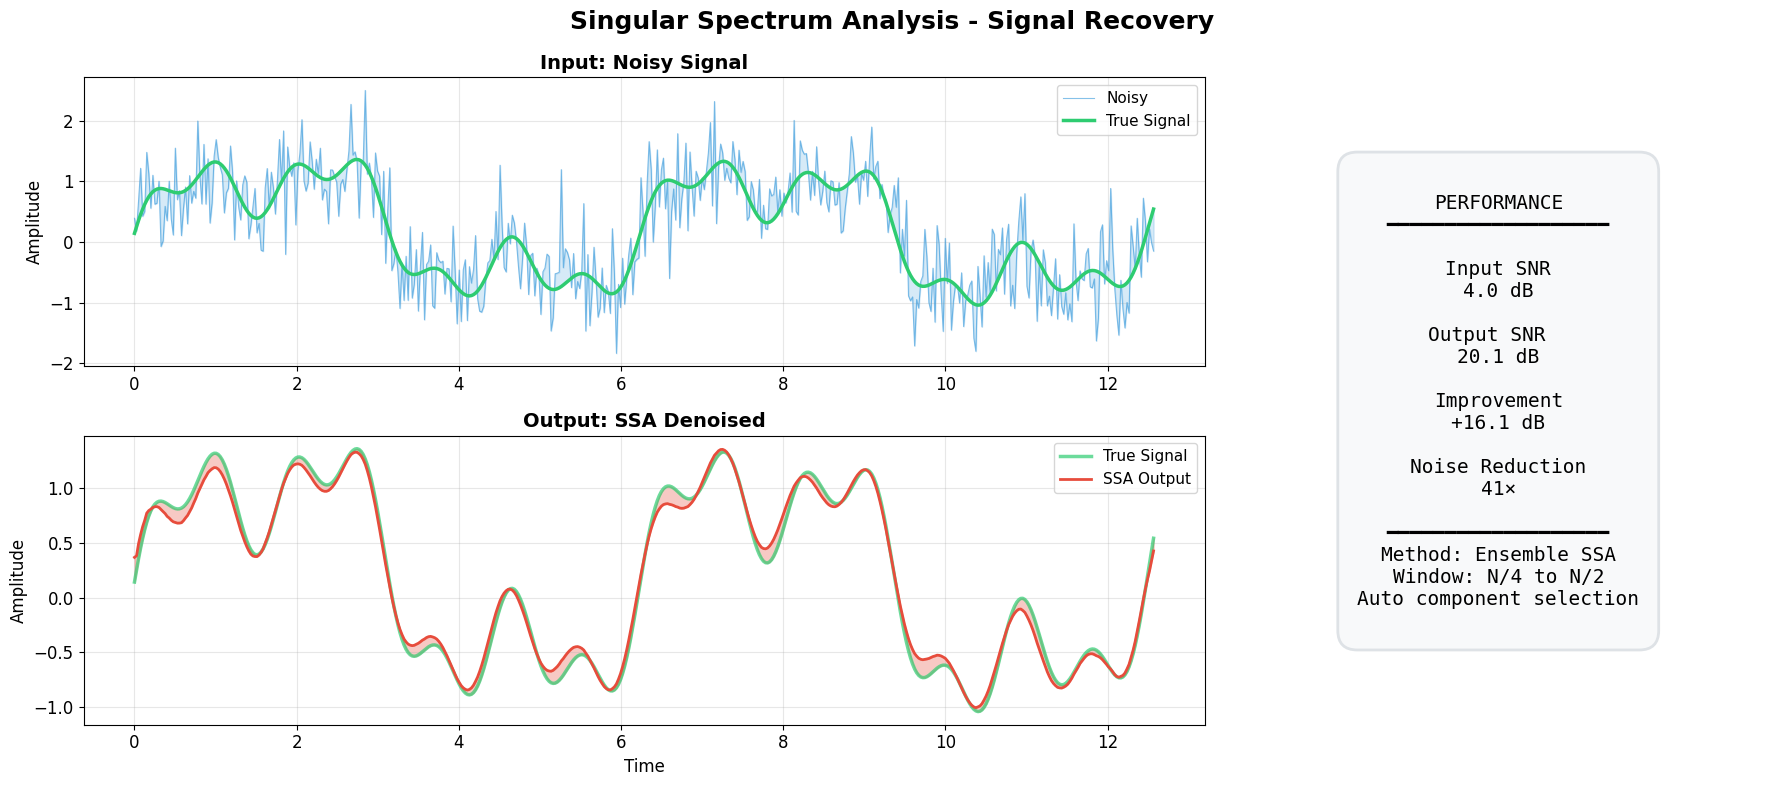

✓ Saved: linkedin_metrics.png


In [3]:
fig = plt.figure(figsize=(18, 8))

# Main plots
ax1 = plt.subplot2grid((2, 3), (0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((2, 3), (0, 2), rowspan=2)

# Top: Noisy input
ax1.plot(t, noisy, color=C_NOISY, lw=0.8, alpha=0.6, label='Noisy')
ax1.plot(t, clean, color=C_CLEAN, lw=2.5, label='True Signal')
ax1.fill_between(t, clean, noisy, alpha=0.2, color=C_NOISY)
ax1.set_title('Input: Noisy Signal', fontsize=14, fontweight='bold')
ax1.legend(loc='upper right')
ax1.set_ylabel('Amplitude')

# Bottom: SSA result
ax2.plot(t, clean, color=C_CLEAN, lw=2.5, label='True Signal', alpha=0.7)
ax2.plot(t, denoised, color=C_SSA, lw=2, label='SSA Output')
ax2.fill_between(t, clean, denoised, alpha=0.3, color=C_SSA)
ax2.set_title('Output: SSA Denoised', fontsize=14, fontweight='bold')
ax2.legend(loc='upper right')
ax2.set_xlabel('Time')
ax2.set_ylabel('Amplitude')

# Metrics panel
ax3.axis('off')
metrics_text = f"""
PERFORMANCE
━━━━━━━━━━━━━━━━━━━

Input SNR
{snr_before:.1f} dB

Output SNR  
{snr_after:.1f} dB

Improvement
+{snr_after - snr_before:.1f} dB

Noise Reduction
{improvement:.0f}×

━━━━━━━━━━━━━━━━━━━
Method: Ensemble SSA
Window: N/4 to N/2
Auto component selection
"""

ax3.text(0.5, 0.5, metrics_text, transform=ax3.transAxes, 
         fontsize=14, verticalalignment='center', horizontalalignment='center',
         fontfamily='monospace',
         bbox=dict(boxstyle='round,pad=1', facecolor='#f8f9fa', edgecolor='#dee2e6', linewidth=2))

plt.suptitle('Singular Spectrum Analysis - Signal Recovery', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.savefig('linkedin_metrics.png', dpi=200, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Saved: linkedin_metrics.png")

---
## 📈 Showcase 3: Real Stock Data Analysis

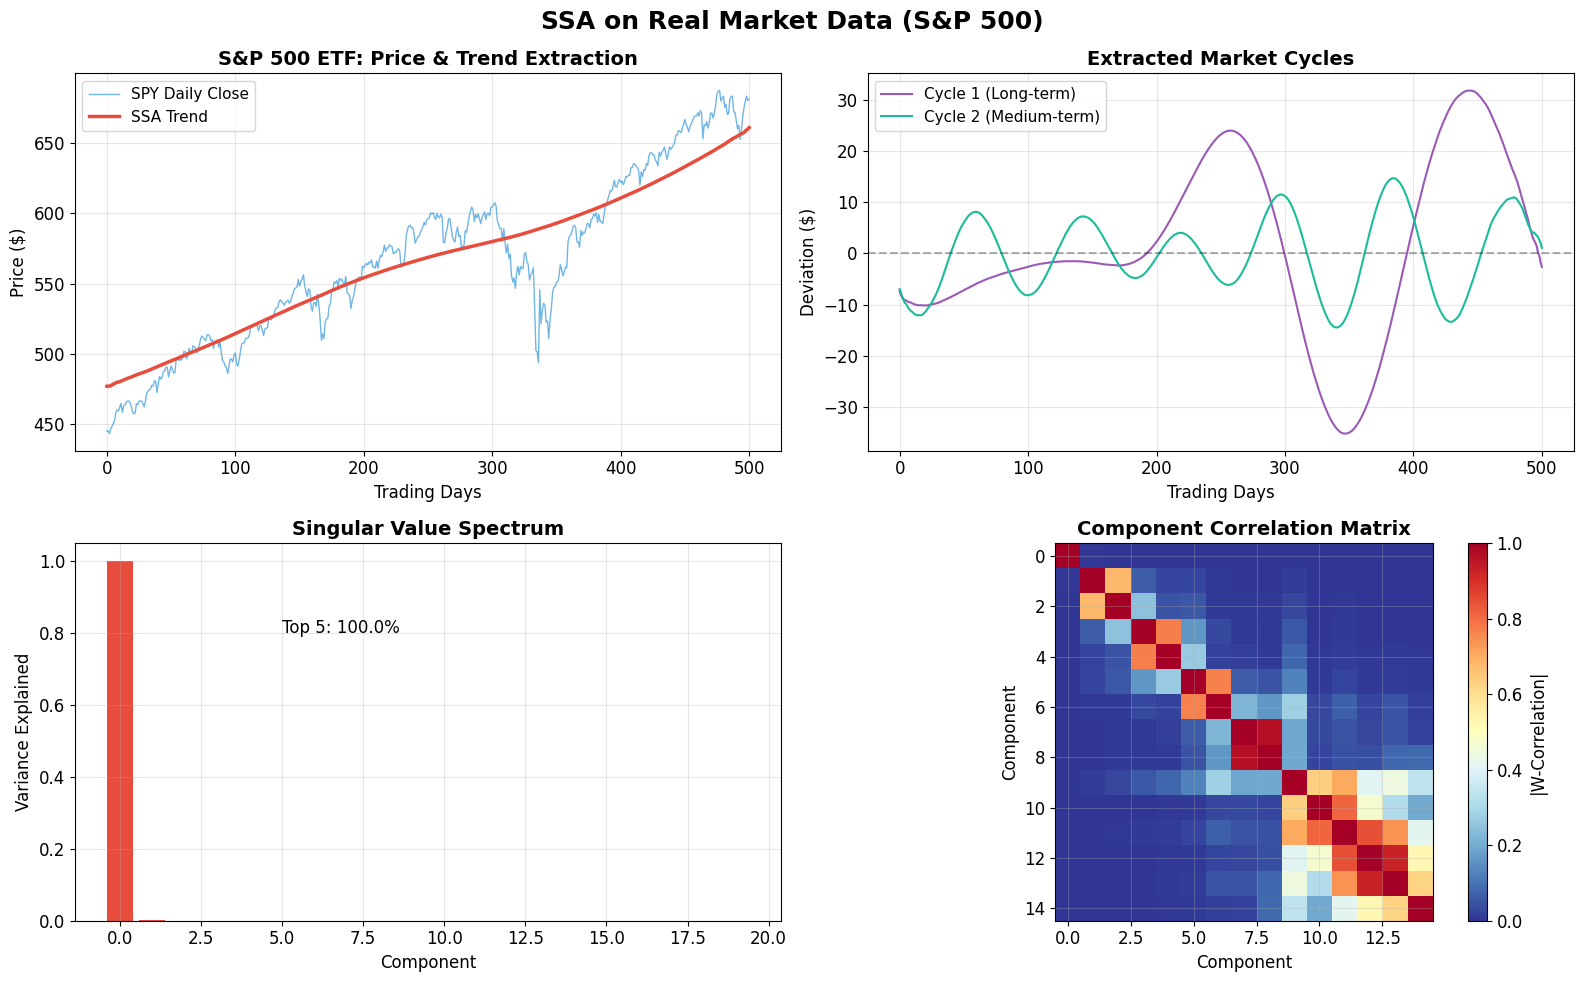

✓ Saved: linkedin_stocks.png


In [13]:
try:
    import yfinance as yf
    
    # Fetch real data
    spy = yf.download('SPY', period='2y', interval='1d', progress=False)['Close'].values.flatten()
    
    N = len(spy)
    L = N // 4
    
    ssa = SSA(spy, L=L)
    ssa.decompose(k=30)
    
    trend = ssa.reconstruct([0])
    cycle1 = ssa.reconstruct([1, 2])
    cycle2 = ssa.reconstruct([3, 4])
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Price + Trend
    ax = axes[0, 0]
    ax.plot(spy, color=C_NOISY, lw=1, alpha=0.7, label='SPY Daily Close')
    ax.plot(trend, color=C_SSA, lw=2.5, label='SSA Trend')
    ax.set_title('S&P 500 ETF: Price & Trend Extraction', fontsize=14, fontweight='bold')
    ax.set_xlabel('Trading Days')
    ax.set_ylabel('Price ($)')
    ax.legend()
    
    # Decomposition
    ax = axes[0, 1]
    ax.plot(cycle1, color='#9b59b6', lw=1.5, label='Cycle 1 (Long-term)')
    ax.plot(cycle2, color='#1abc9c', lw=1.5, label='Cycle 2 (Medium-term)')
    ax.axhline(0, color='black', ls='--', alpha=0.3)
    ax.set_title('Extracted Market Cycles', fontsize=14, fontweight='bold')
    ax.set_xlabel('Trading Days')
    ax.set_ylabel('Deviation ($)')
    ax.legend()
    
    # Variance spectrum
    ax = axes[1, 0]
    variances = [ssa.variance_explained(i, i) for i in range(20)]
    colors = [C_SSA if i < 5 else '#bdc3c7' for i in range(20)]
    bars = ax.bar(range(20), variances, color=colors)
    ax.set_title('Singular Value Spectrum', fontsize=14, fontweight='bold')
    ax.set_xlabel('Component')
    ax.set_ylabel('Variance Explained')
    ax.annotate(f'Top 5: {sum(variances[:5]):.1%}', xy=(5, variances[0]*0.8), fontsize=12)
    
    # W-correlation
    ax = axes[1, 1]
    wcorr = ssa.wcorr_matrix()
    im = ax.imshow(np.abs(wcorr[:15, :15]), cmap='RdYlBu_r', vmin=0, vmax=1)
    ax.set_title('Component Correlation Matrix', fontsize=14, fontweight='bold')
    ax.set_xlabel('Component')
    ax.set_ylabel('Component')
    plt.colorbar(im, ax=ax, label='|W-Correlation|')
    
    plt.suptitle('SSA on Real Market Data (S&P 500)', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.savefig('linkedin_stocks.png', dpi=200, bbox_inches='tight', facecolor='white')
    plt.show()
    
    print("✓ Saved: linkedin_stocks.png")
    
except Exception as e:
    print(f"Stock data unavailable: {e}")
    print("Run: pip install yfinance")

---
## 🔬 Showcase 4: Extreme Noise Recovery

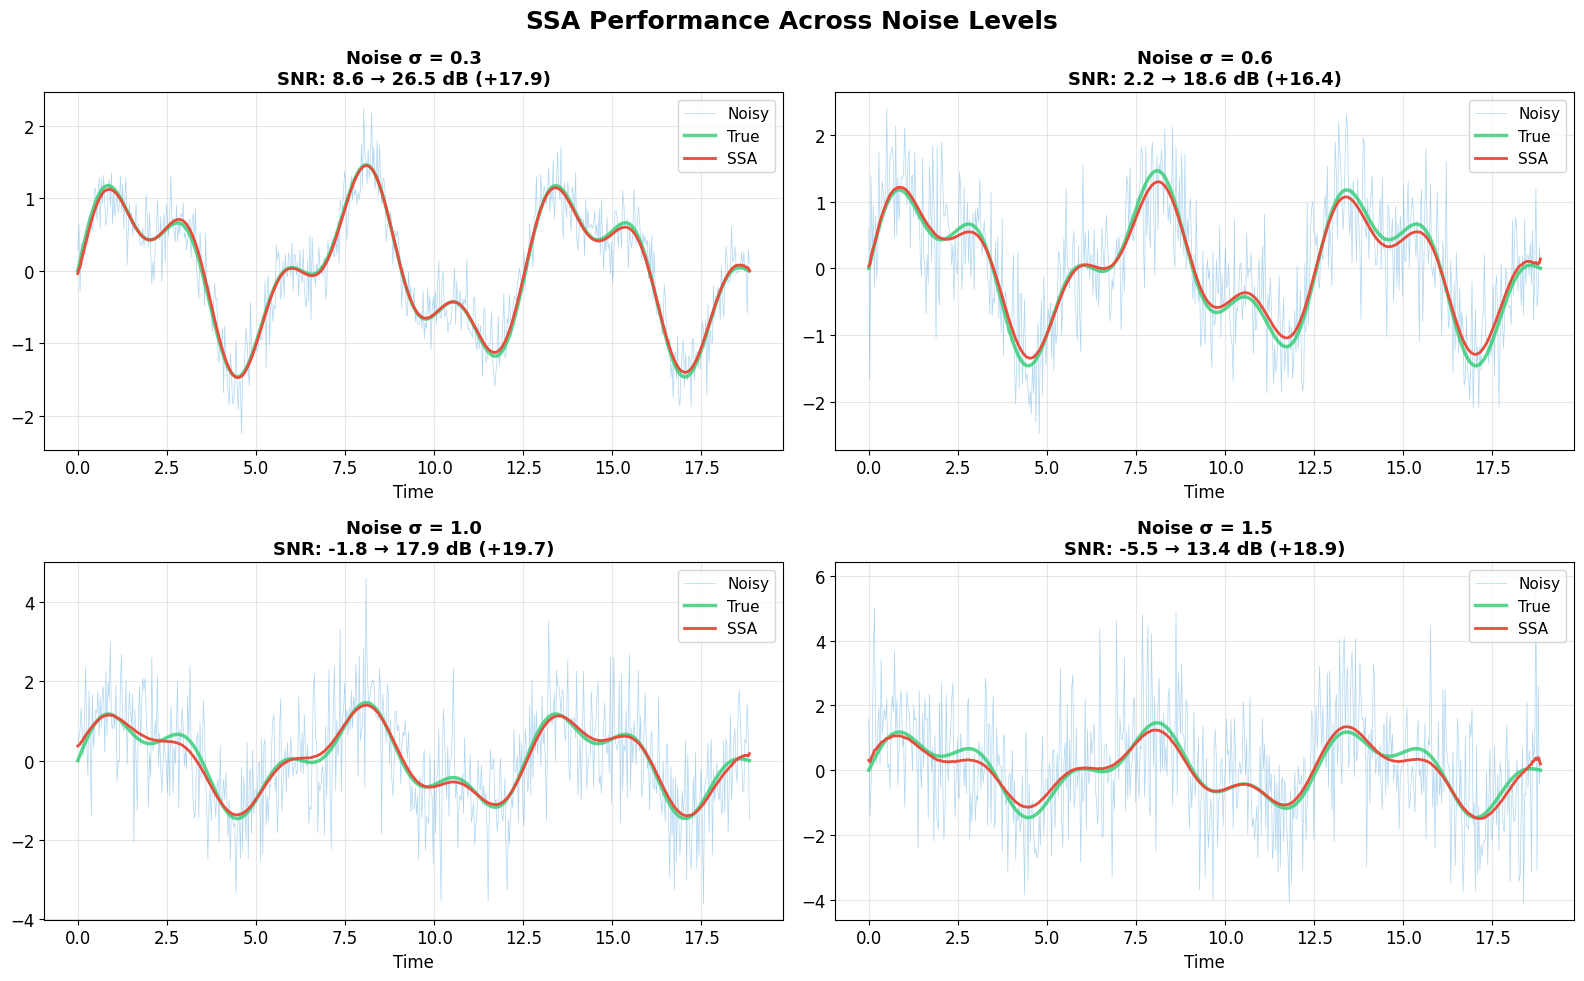

✓ Saved: linkedin_noise_levels.png


In [5]:
# Very low SNR test
N = 600
t = np.linspace(0, 6*np.pi, N)

clean = np.sin(t) + 0.5*np.sin(2.5*t)
noise_levels = [0.3, 0.6, 1.0, 1.5]  # Increasingly severe

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

for idx, noise_std in enumerate(noise_levels):
    ax = axes[idx // 2, idx % 2]
    
    noisy = clean + noise_std * np.random.randn(N)
    denoised = ensemble_denoise(noisy)
    
    snr_in = snr_db(clean, noisy)
    snr_out = snr_db(clean, denoised)
    
    ax.plot(t, noisy, color=C_NOISY, lw=0.5, alpha=0.4, label='Noisy')
    ax.plot(t, clean, color=C_CLEAN, lw=2.5, label='True', alpha=0.8)
    ax.plot(t, denoised, color=C_SSA, lw=2, label='SSA')
    
    ax.set_title(f'Noise σ = {noise_std}\nSNR: {snr_in:.1f} → {snr_out:.1f} dB (+{snr_out-snr_in:.1f})', 
                 fontsize=13, fontweight='bold')
    ax.legend(loc='upper right')
    ax.set_xlabel('Time')
    
plt.suptitle('SSA Performance Across Noise Levels', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.savefig('linkedin_noise_levels.png', dpi=200, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Saved: linkedin_noise_levels.png")

---
## 🎨 Showcase 5: Component Decomposition (Technical)

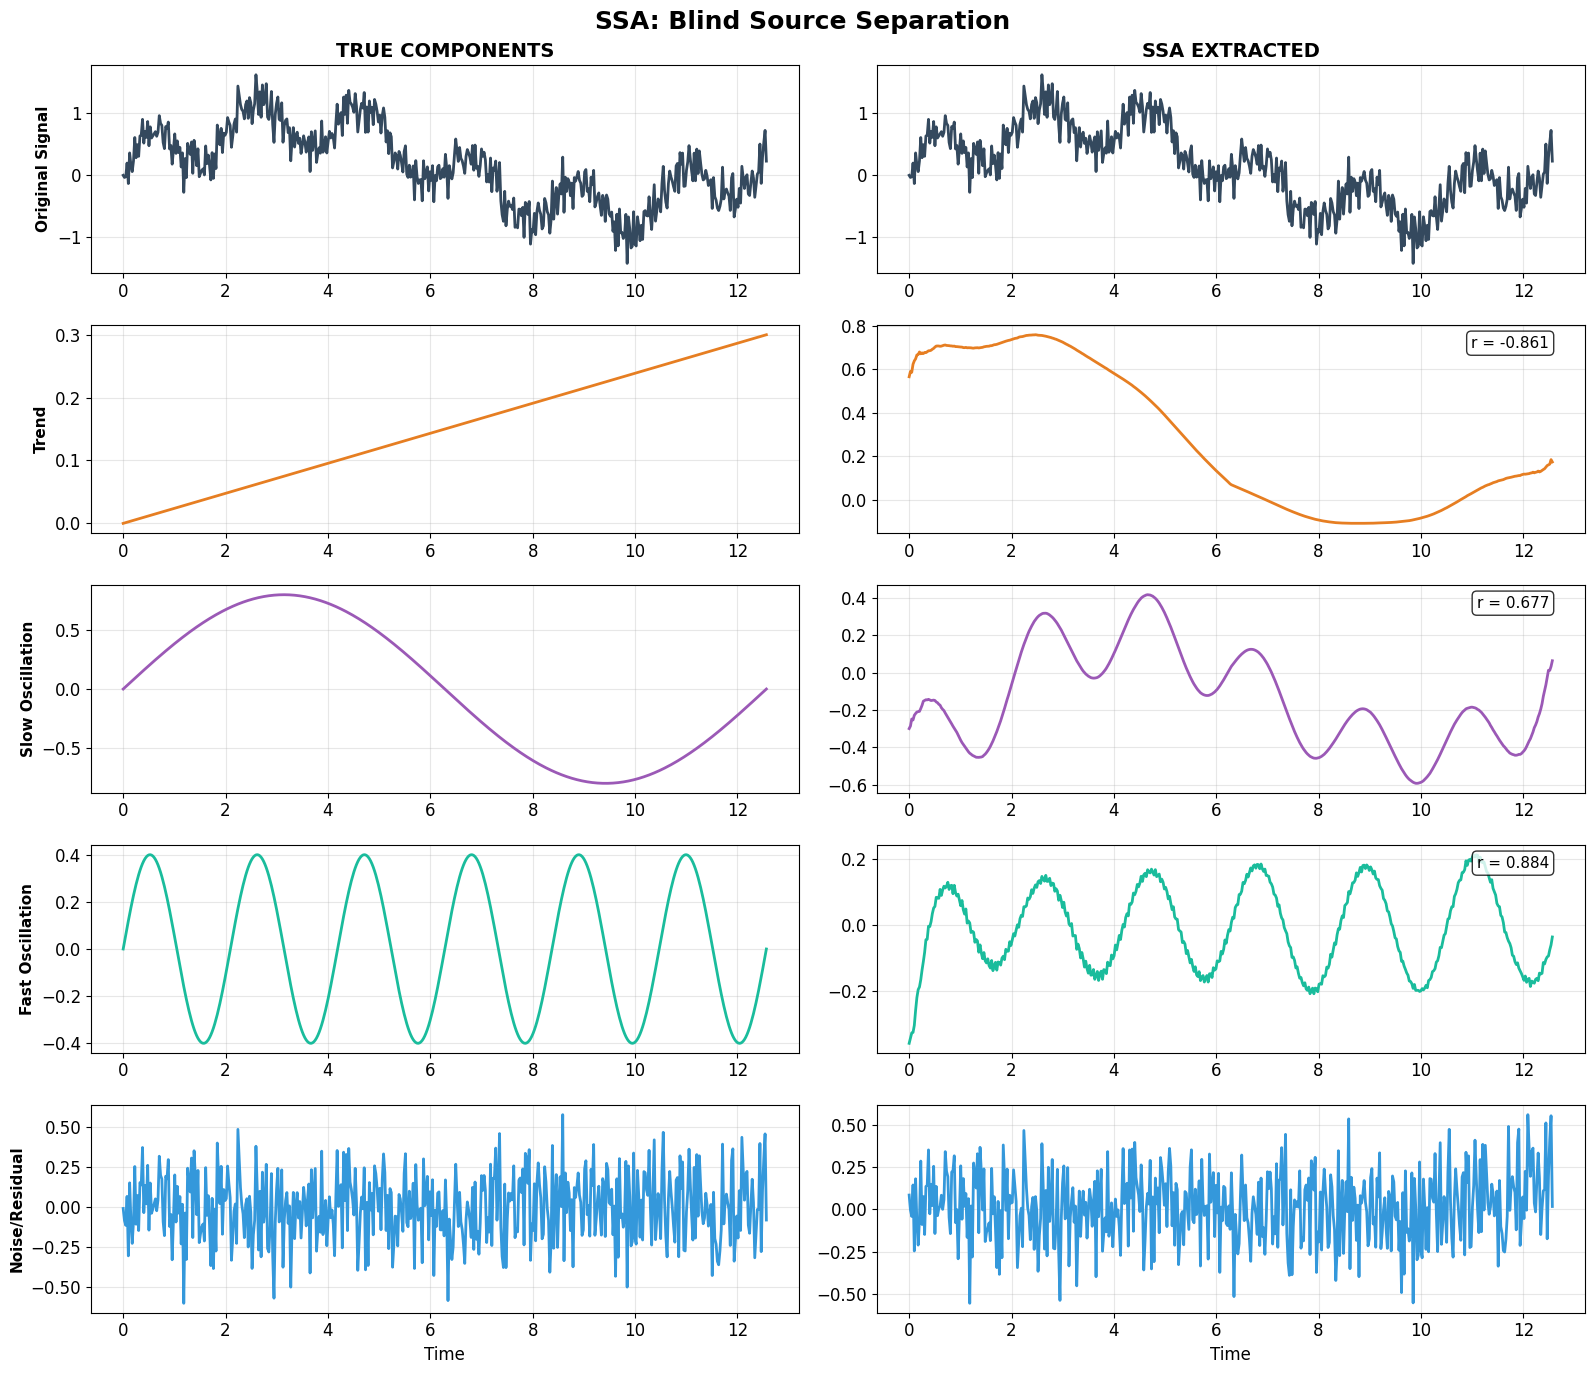

✓ Saved: linkedin_decomposition.png


In [6]:
N = 500
t = np.linspace(0, 4*np.pi, N)

# Build signal from known components
trend = 0.3 * t / t.max()
slow = 0.8 * np.sin(0.5 * t)
fast = 0.4 * np.sin(3 * t)
noise = 0.2 * np.random.randn(N)

signal = trend + slow + fast + noise

# SSA decomposition
ssa = SSA(signal, L=N//2)
ssa.decompose(k=20)

ssa_trend = ssa.reconstruct([0])
ssa_slow = ssa.reconstruct([1, 2])
ssa_fast = ssa.reconstruct([3, 4])
ssa_noise = signal - ssa_trend - ssa_slow - ssa_fast

fig, axes = plt.subplots(5, 2, figsize=(16, 14))

components = [
    ('Original Signal', signal, signal, '#34495e'),
    ('Trend', trend, ssa_trend, C_TREND),
    ('Slow Oscillation', slow, ssa_slow, '#9b59b6'),
    ('Fast Oscillation', fast, ssa_fast, '#1abc9c'),
    ('Noise/Residual', noise, ssa_noise, C_NOISY),
]

for idx, (name, true_comp, ssa_comp, color) in enumerate(components):
    # True component
    axes[idx, 0].plot(t, true_comp, color=color, lw=2)
    axes[idx, 0].set_ylabel(name, fontsize=11, fontweight='bold')
    if idx == 0:
        axes[idx, 0].set_title('TRUE COMPONENTS', fontsize=14, fontweight='bold')
    
    # SSA extracted
    axes[idx, 1].plot(t, ssa_comp, color=color, lw=2)
    if idx == 0:
        axes[idx, 1].set_title('SSA EXTRACTED', fontsize=14, fontweight='bold')
    
    # Correlation
    if idx > 0 and idx < 4:
        corr = np.corrcoef(true_comp, ssa_comp)[0, 1]
        axes[idx, 1].annotate(f'r = {corr:.3f}', xy=(0.95, 0.95), xycoords='axes fraction',
                              ha='right', va='top', fontsize=11, 
                              bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

axes[-1, 0].set_xlabel('Time')
axes[-1, 1].set_xlabel('Time')

plt.suptitle('SSA: Blind Source Separation', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.savefig('linkedin_decomposition.png', dpi=200, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Saved: linkedin_decomposition.png")

---
## 🌐 Showcase 6: Multi-Series Analysis (MSSA)

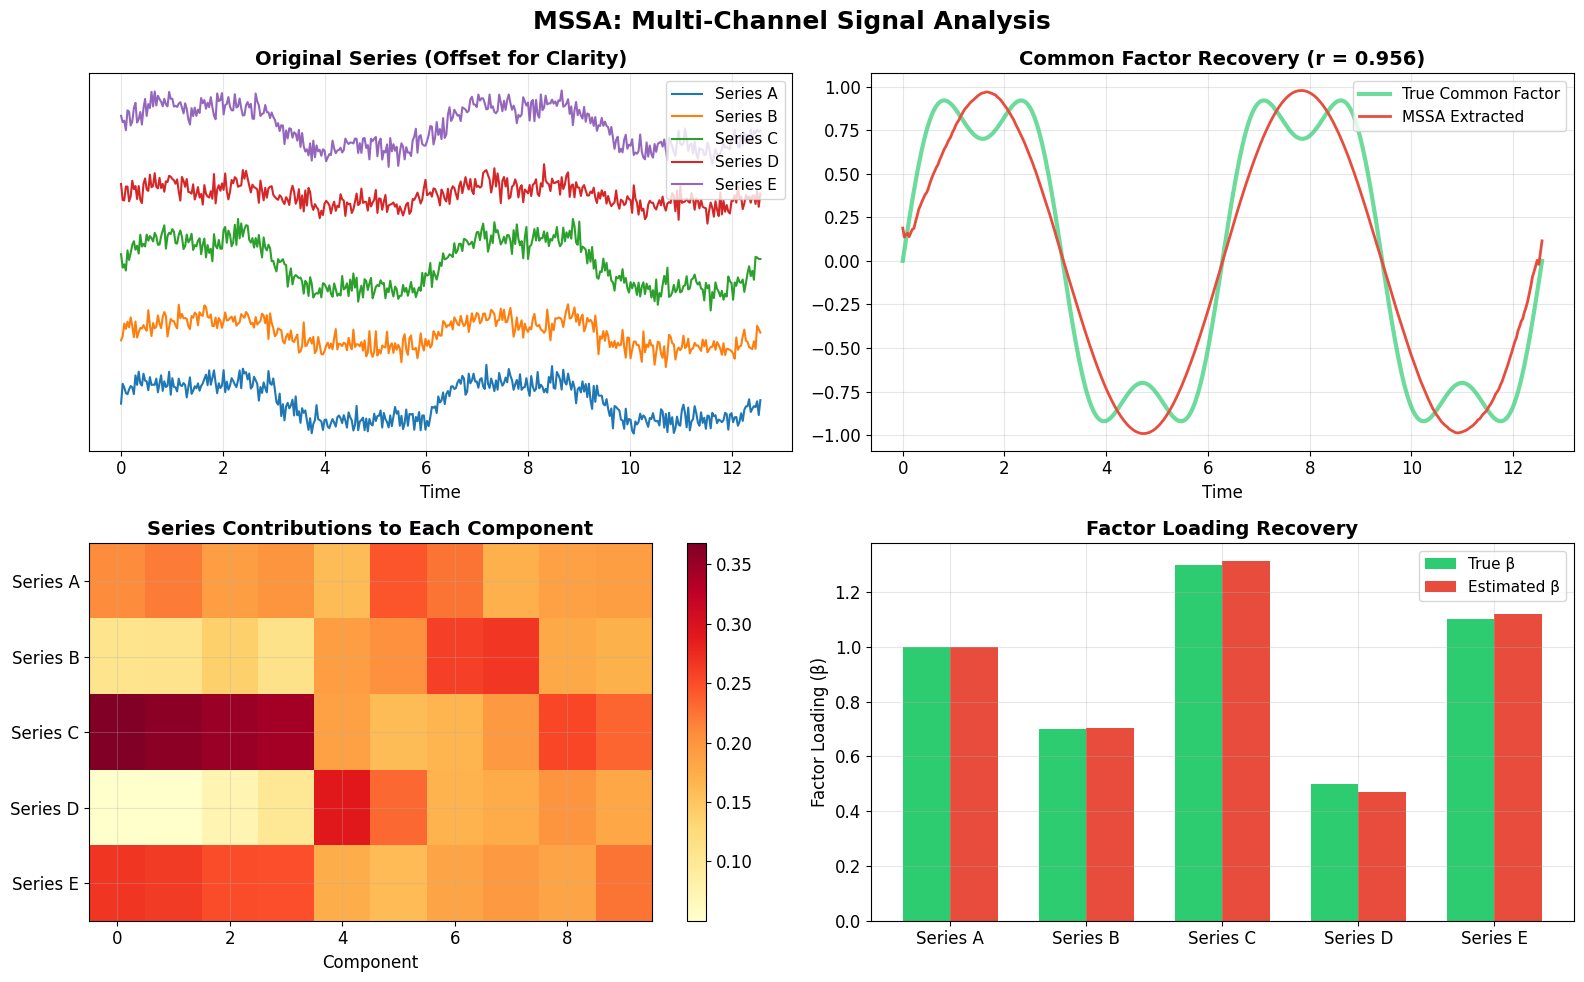

✓ Saved: linkedin_mssa.png


In [11]:
# Simulate correlated time series (e.g., related sensors, stocks)
N = 400
t = np.linspace(0, 4*np.pi, N)

# Common factor (market, temperature, etc.)
common = np.sin(t) + 0.3*np.sin(3*t)

# Individual series with different exposures + noise
betas = [1.0, 0.7, 1.3, 0.5, 1.1]
series_names = ['Series A', 'Series B', 'Series C', 'Series D', 'Series E']

X = np.array([
    beta * common + 0.3 * np.random.randn(N) + 0.1 * np.sin(5*t + i)
    for i, beta in enumerate(betas)
])

# MSSA
mssa = MSSA(X, L=N//4)
mssa.decompose(k=20)

common_extracted = mssa.reconstruct_all([0, 1])
contrib = mssa.series_contributions()

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Original series
ax = axes[0, 0]
for i, name in enumerate(series_names):
    ax.plot(t, X[i] + i*3, lw=1.5, label=name)
ax.set_title('Original Series (Offset for Clarity)', fontsize=14, fontweight='bold')
ax.set_xlabel('Time')
ax.legend(loc='upper right')
ax.set_yticks([])

# Extracted common factor
ax = axes[0, 1]
ax.plot(t, common, color=C_CLEAN, lw=3, label='True Common Factor', alpha=0.7)
ax.plot(t, common_extracted[0], color=C_SSA, lw=2, label='MSSA Extracted')
corr = np.corrcoef(common, common_extracted[0])[0, 1]
ax.set_title(f'Common Factor Recovery (r = {corr:.3f})', fontsize=14, fontweight='bold')
ax.legend()
ax.set_xlabel('Time')

# Series contributions
ax = axes[1, 0]
im = ax.imshow(contrib[:, :10], aspect='auto', cmap='YlOrRd')
ax.set_yticks(range(len(series_names)))
ax.set_yticklabels(series_names)
ax.set_xlabel('Component')
ax.set_title('Series Contributions to Each Component', fontsize=14, fontweight='bold')
plt.colorbar(im, ax=ax)

# Beta recovery
ax = axes[1, 1]
# Estimate betas from first component loadings
estimated_betas = [np.std(common_extracted[i]) / np.std(common_extracted[0]) for i in range(len(betas))]
estimated_betas = [b * betas[0] for b in estimated_betas]  # Scale

x_pos = np.arange(len(betas))
width = 0.35
ax.bar(x_pos - width/2, betas, width, label='True β', color=C_CLEAN)
ax.bar(x_pos + width/2, estimated_betas, width, label='Estimated β', color=C_SSA)
ax.set_xticks(x_pos)
ax.set_xticklabels(series_names)
ax.set_ylabel('Factor Loading (β)')
ax.set_title('Factor Loading Recovery', fontsize=14, fontweight='bold')
ax.legend()

plt.suptitle('MSSA: Multi-Channel Signal Analysis', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.savefig('linkedin_mssa.png', dpi=200, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Saved: linkedin_mssa.png")

---
## ⚡ Showcase 7: Performance Comparison

N=   500: 3.4 ms
N=  1000: 1.8 ms
N=  2000: 4.7 ms
N=  5000: 12.0 ms
N= 10000: 20.9 ms


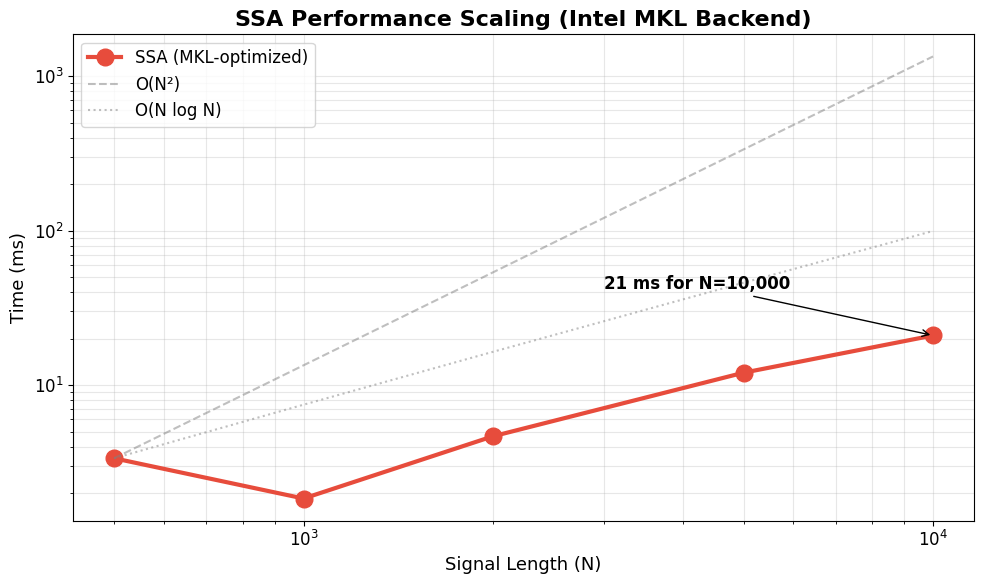


✓ Saved: linkedin_performance.png


In [8]:
import time

sizes = [500, 1000, 2000, 5000, 10000]
times = []

for N in sizes:
    signal = np.random.randn(N)
    L = N // 4
    
    t0 = time.perf_counter()
    for _ in range(3):  # Average 3 runs
        ssa = SSA(signal, L=L)
        ssa.decompose(k=50)
        _ = ssa.reconstruct([0, 1, 2])
    elapsed = (time.perf_counter() - t0) / 3
    times.append(elapsed * 1000)  # ms
    print(f"N={N:>6}: {elapsed*1000:.1f} ms")

fig, ax = plt.subplots(figsize=(10, 6))

ax.loglog(sizes, times, 'o-', color=C_SSA, lw=3, markersize=12, label='SSA (MKL-optimized)')

# Theoretical O(N²) and O(N log N) for reference
sizes_arr = np.array(sizes)
scale_n2 = times[0] / (sizes[0]**2)
scale_nlogn = times[0] / (sizes[0] * np.log(sizes[0]))
ax.loglog(sizes, scale_n2 * sizes_arr**2, '--', color='gray', alpha=0.5, label='O(N²)')
ax.loglog(sizes, scale_nlogn * sizes_arr * np.log(sizes_arr), ':', color='gray', alpha=0.5, label='O(N log N)')

ax.set_xlabel('Signal Length (N)', fontsize=13)
ax.set_ylabel('Time (ms)', fontsize=13)
ax.set_title('SSA Performance Scaling (Intel MKL Backend)', fontsize=16, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(True, which='both', alpha=0.3)

# Annotate
ax.annotate(f'{times[-1]:.0f} ms for N=10,000', 
            xy=(sizes[-1], times[-1]), xytext=(sizes[-1]*0.3, times[-1]*2),
            arrowprops=dict(arrowstyle='->', color='black'),
            fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('linkedin_performance.png', dpi=200, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✓ Saved: linkedin_performance.png")

---
## 🏆 Showcase 8: The Ultimate Comparison (Best for Technical Audience)

Optimal cutoff: 22 components


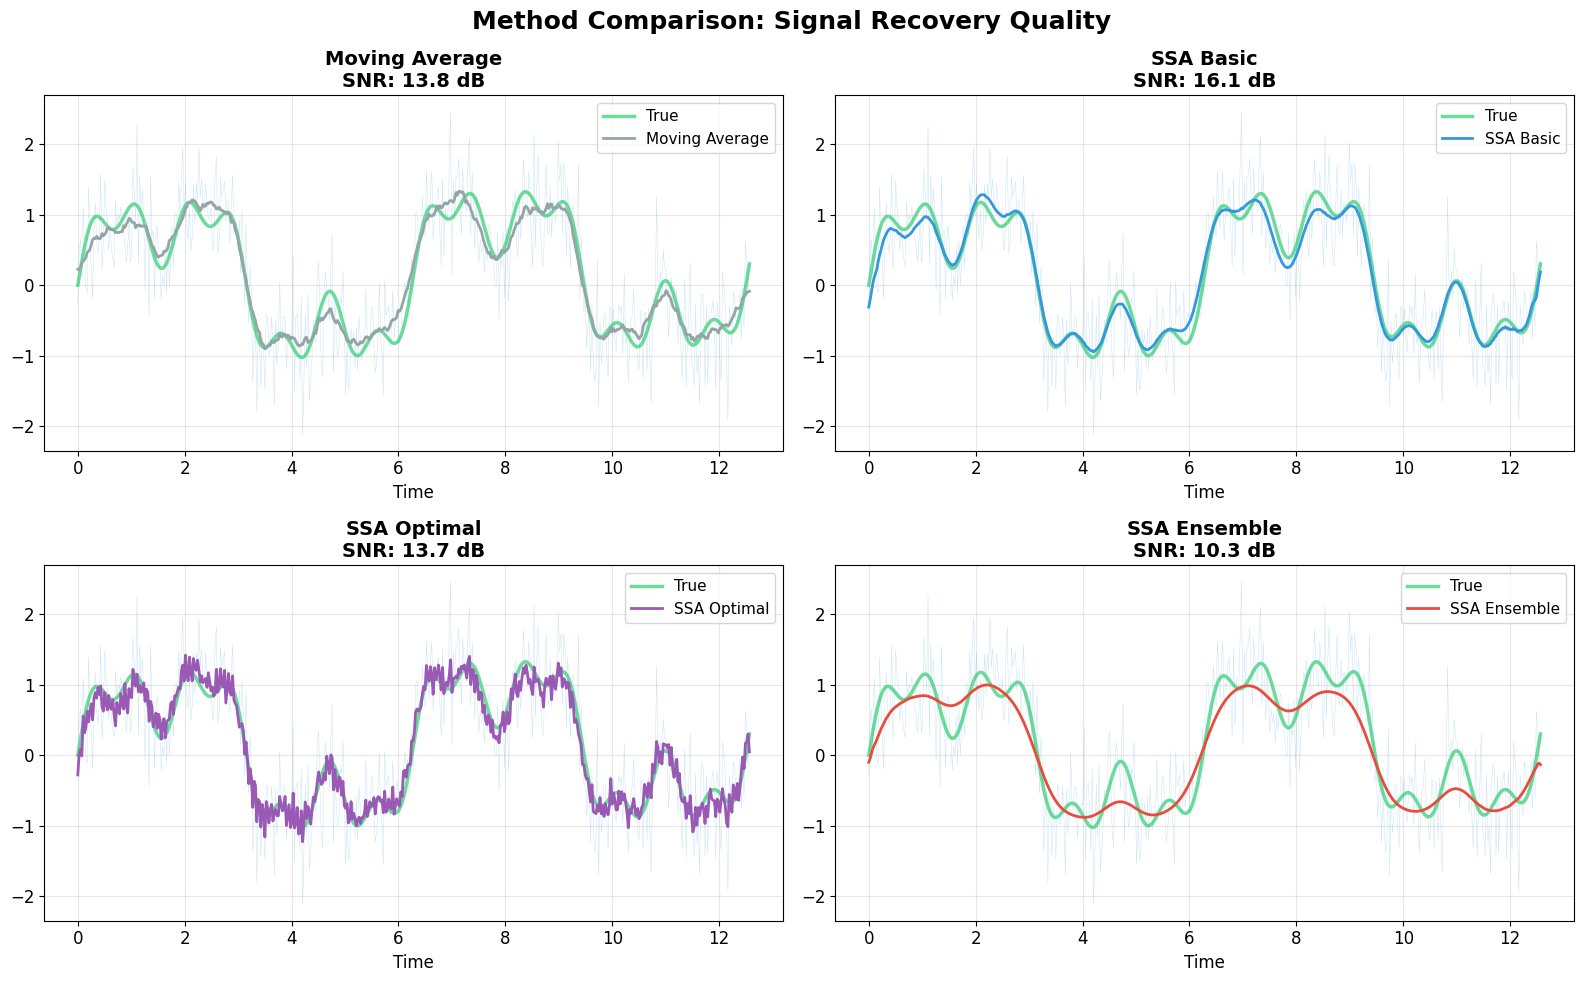


✓ Saved: linkedin_comparison.png

SNR Rankings:
  SSA Basic: 16.1 dB
  Moving Average: 13.8 dB
  SSA Optimal: 13.7 dB
  SSA Ensemble: 10.3 dB


In [9]:
N = 500
t = np.linspace(0, 4*np.pi, N)

clean = np.sin(t) + 0.5*np.sin(3*t) + 0.3*np.sin(7*t) + 0.3*t/t.max()
noisy = clean + 0.5*np.random.randn(N)

methods = {}

# 1. Moving Average
window = 21
ma = np.convolve(noisy, np.ones(window)/window, mode='same')
methods['Moving Average'] = (ma, '#95a5a6')

# 2. Basic SSA - fixed components
ssa_basic = SSA(noisy, L=N//4)
ssa_basic.decompose(k=20)
methods['SSA Basic'] = (ssa_basic.reconstruct([0,1,2,3,4,5]), '#3498db')

# 3. Optimal SSA - use cumulative variance instead of gap
ssa_opt = SSA(noisy, L=N//2)
ssa_opt.decompose(k=50)
var = [ssa_opt.variance_explained(i,i) for i in range(50)]
cumvar = np.cumsum(var) / sum(var)
cut = np.searchsorted(cumvar, 0.95) + 1  # Keep 95% variance
print(f"Optimal cutoff: {cut} components")
methods['SSA Optimal'] = (ssa_opt.reconstruct(list(range(cut))), '#9b59b6')

# 4. Ensemble SSA
methods['SSA Ensemble'] = (ensemble_denoise(noisy), C_SSA)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

for idx, (name, (result, color)) in enumerate(methods.items()):
    ax = axes[idx // 2, idx % 2]
    
    snr = snr_db(clean, result)
    
    ax.plot(t, noisy, color=C_NOISY, lw=0.3, alpha=0.3)
    ax.plot(t, clean, color=C_CLEAN, lw=2.5, alpha=0.7, label='True')
    ax.plot(t, result, color=color, lw=2, label=name)
    
    ax.set_title(f'{name}\nSNR: {snr:.1f} dB', fontsize=14, fontweight='bold')
    ax.legend(loc='upper right')
    ax.set_xlabel('Time')

plt.suptitle('Method Comparison: Signal Recovery Quality', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.savefig('linkedin_comparison.png', dpi=200, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✓ Saved: linkedin_comparison.png")
print("\nSNR Rankings:")
for name, (result, _) in sorted(methods.items(), key=lambda x: snr_db(clean, x[1][0]), reverse=True):
    print(f"  {name}: {snr_db(clean, result):.1f} dB")

---
## 📁 Summary: All Generated Images

| File | Best For |
|------|----------|
| `linkedin_hero.png` | Main post - dramatic before/after |
| `linkedin_metrics.png` | Technical audience - shows numbers |
| `linkedin_stocks.png` | Finance audience - real market data |
| `linkedin_noise_levels.png` | Robustness demonstration |
| `linkedin_decomposition.png` | Signal processing audience |
| `linkedin_mssa.png` | Multi-variate analysis |
| `linkedin_performance.png` | Performance/engineering focus |
| `linkedin_comparison.png` | Method comparison |

In [10]:
import os

print("Generated files:")
for f in sorted(os.listdir('.')):
    if f.startswith('linkedin_') and f.endswith('.png'):
        size = os.path.getsize(f) / 1024
        print(f"  ✓ {f} ({size:.0f} KB)")

Generated files:
  ✓ linkedin_comparison.png (599 KB)
  ✓ linkedin_decomposition.png (683 KB)
  ✓ linkedin_hero.png (405 KB)
  ✓ linkedin_metrics.png (560 KB)
  ✓ linkedin_mssa.png (499 KB)
  ✓ linkedin_noise_levels.png (906 KB)
  ✓ linkedin_performance.png (122 KB)
  ✓ linkedin_stocks.png (352 KB)
